In [1]:
import pandas as pd 
import numpy as np

import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#from Data import kc_house_data.csv

house = pd.read_csv('Data/kc_house_data.csv')

month = []
year = []
for date in house.date:
    month.append(int(date.split('/')[0]))
    year.append(int (date.split('/')[2]))
house['month'] = month
house['year'] = (year)


house.fillna(value = 0, inplace=True)

house.sqft_basement.replace('?', '0.0', inplace=True)

house['sqft_basement'] = house['sqft_basement'].astype(float)

house_filt = house[(house['price'] < 2000000)].copy()

house_filt = house_filt[(house_filt['bedrooms'] <= 2)].copy()

house_filt = house_filt[(house_filt['bathrooms'] <= 2)].copy()

house_filt = house_filt[(house_filt['sqft_living'] <= 3000)].copy()

house_filt = house_filt[(house_filt['sqft_above'] <= 3000)].copy()

#df_housing = df_housing.loc[df_housing['price'] < 4_500_000]
#df_housing = df_housing.loc[df_housing['bedrooms']< 33]

X = house_filt[['sqft_living']]
Y = house_filt['price']

X_train, X_test,Y_train,Y_test = train_test_split(X, Y,test_size =0.3)
X_test


,sqft_living
5988,610
12558,770
12933,1300
18744,1870
15484,1240
...,...
8699,1000
8253,1470
10734,950
10201,850


house_filt.plot.scatter(x = 'sqft_living', y= 'price');



import statsmodels.api as sm
X = sm.add_constant(X)
base_model = sm.OLS(Y_test,X_test).fit()
base_model.summary()

In [2]:
predictors = X_test

import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
base_model = sm.OLS(Y_test,predictors_int).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     269.2
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           3.81e-52
Time:                        00:18:58   Log-Likelihood:                -10321.
No. Observations:                 777   AIC:                         2.065e+04
Df Residuals:                     775   BIC:                         2.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.342e+05   1.57e+04      8.529      0.000    1.03e+05    1.65e+05
sqft_living   214.2806     13.061     16.406      0.000     188.642     239.920
==============================================================================
Omnibus:                       84.771   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.429
Skew:                           0.732   Prob(JB):                     8.72e-31
Kurtosis:                       4.460   Cond. No.                     3.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The rsquared value here is 21% which is very low, this means this independent variable (sqft_living) is explaining 21% of the depednent variable which price. 

Skewness is positively right skewed(?) 

Kurtosis is within the 1-7 range



#Y_pred = base_model.predict(X_test)

#plt.scatter(X_test, Y_test, color ='b')

#plt.plot(X_test, Y_pred, color ='k')

#plt.show()

#linear_model =  ols('price ~ sqft_living', data=house_filt).fit()


In [ ]:
plt.scatter(house_filt['price'],house_filt['sqft_living'])

In [ ]:
sns.histplot(base_model.resid);

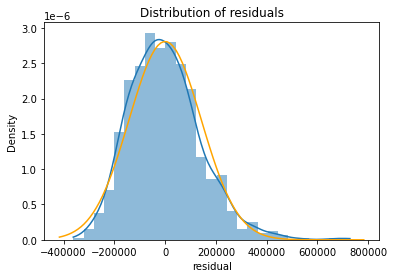

In [3]:
mu, std = stats.norm.fit(base_model.resid)
mu, std

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=base_model.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

#showing the residuals

residuals = (Y_train - base_model.predict(X_train)).values


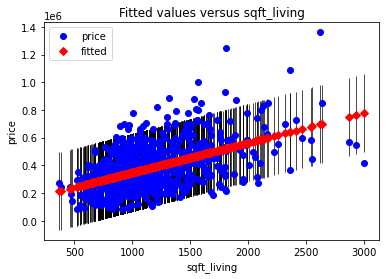

In [4]:
sm.graphics.plot_fit(base_model, 'sqft_living')
plt.show()

<AxesSubplot:>

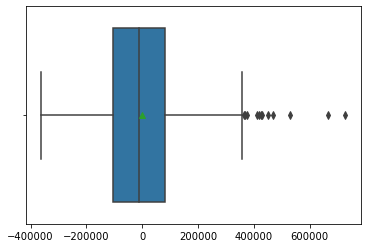

In [5]:
sns.boxplot(x=base_model.resid, showmeans=True)

#residuals showing mainlyscattered around 0

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

y_pred = regressor.predict(X_test)

plt.scatter(X_train, Y_train,color='g')
plt.plot(X_test, y_pred,color='k')

plt.show()

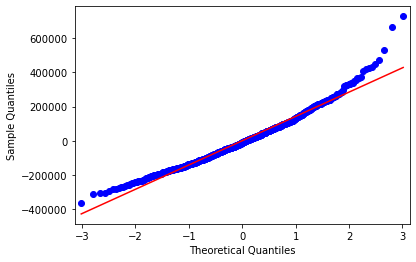

In [6]:
sm.qqplot(base_model.resid, line='s');

#QQ plot

In [ ]:
#diabetes_y_pred = regr.predict(diabetes_X_test)

measurements = np.y_pred(loc = 20, scale = 5, size=100)   
stats.probplot(y_pred, dist="norm", plot=pylab)
pylab.show()

In [ ]:
#baseline_model = sm.OLS(y, sm.add_constant(X))
#baseline_results = baseline_model.fit()

#print(baseline_results.summary())

In [7]:
abs(house.corr()['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
month            0.009928
year             0.003727
Name: price, dtype: float64

In [8]:
X_2 = house_filt[['bathrooms','sqft_living', 'sqft_above', 'grade', 'view']]
Y_2 = house_filt['price']
X_2.head(10)

x2_train, x2_test,y2_train,y2_test = train_test_split(X_2,Y_2,test_size =0.3)

predictors_2 = x2_test

import statsmodels.api as sm
predictors_int = sm.add_constant(predictors_2)
model_2 = sm.OLS(y2_test,predictors_int).fit()
model_2.summary()

#2nd model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     72.74
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           2.10e-62
Time:                        00:19:53   Log-Likelihood:                -10229.
No. Observations:                 777   AIC:                         2.047e+04
Df Residuals:                     771   BIC:                         2.050e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.564e+05   3.55e+04     -4.401      0.000   -2.26e+05   -8.66e+04
bathrooms    -1.27e+04   1.45e+04     -0.876      0.381   -4.12e+04    1.58e+04
sqft_living   119.2370     20.625      5.781      0.000      78.748     159.726
sqft_above    -55.5423     24.816     -2.238      0.025    -104.257      -6.827
grade        6.806e+04   6558.552     10.377      0.000    5.52e+04    8.09e+04
view         5.285e+04   7124.083      7.419      0.000    3.89e+04    6.68e+04
==============================================================================
Omnibus:                       68.623   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.762
Skew:                           0.614   Prob(JB):                     3.27e-25
Kurtosis:                       4.406   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

going to include grade in the multiple linear so changing it to dummy variables to counteract multicollinearity

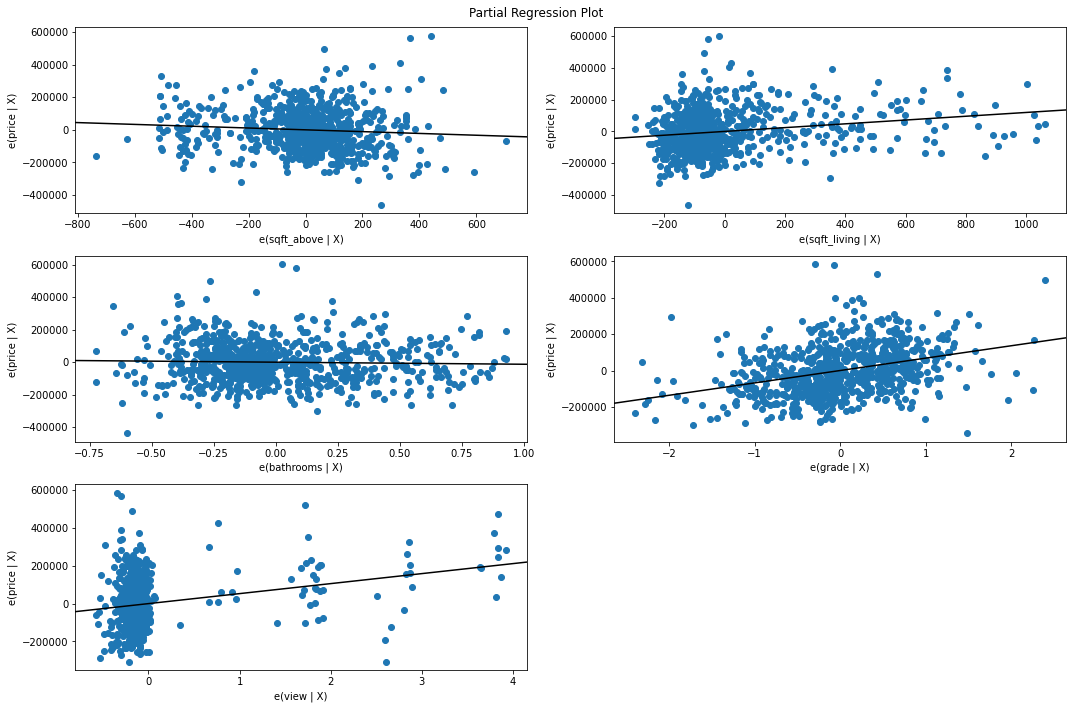

In [9]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(model_2, exog_idx=['sqft_above','sqft_living','bathrooms', 'grade', 'view'], fig=fig)
plt.tight_layout()
plt.show()

regressor2 = LinearRegression()
regressor2.fit(x2_train, y2_train)

y2_pred = regressor2.predict(x2_test)

plt.scatter(x2_train, y2_train,color='g')
plt.plot(x2_test, y2_pred,color='k')

plt.show()

regressor_2 = LinearRegression()
regressor_2.fit(x2_train, y2_train)

y2_pred = regressor_2.predict(x2_test)

plt.scatter(x2_train, y2_train,color='g')
plt.plot(x2_test, y2_pred,color='k')

plt.show()

<AxesSubplot:>

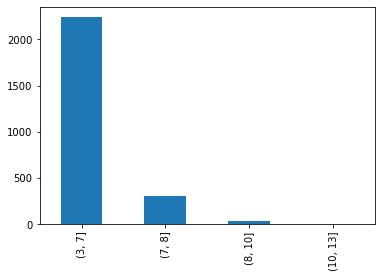

In [10]:
bins = [3,7,8,10,13]
bins_grade = pd.cut(house_filt['grade'],bins)
bins_grade.value_counts().plot(kind='bar')

In [11]:
bins_grade = bins_grade.cat.as_unordered()
grade_dummy = pd.get_dummies(bins_grade, prefix='grade')

#creating dummy variabels for grade because grade is in categories

In [ ]:
house_filt

In [12]:
house_filt.drop('date', axis=1, inplace=True)
house_filt.drop('id', axis=1, inplace=True)
house_filt.drop('lat', axis=1, inplace=True)
house_filt.drop('long', axis=1, inplace=True)
house_filt.drop('sqft_living15', axis=1, inplace=True)
house_filt.drop('sqft_lot15', axis=1, inplace=True)
house_filt.drop('waterfront', axis=1, inplace=True)
house_filt.drop('condition', axis=1, inplace=True)
#house_filt.drop('sqft_basement', axis=1, inplace=True)
house_filt.drop('yr_built', axis=1, inplace=True)
house_filt.drop('yr_renovated', axis=1, inplace=True)
house_filt.drop('zipcode', axis=1, inplace=True)
house_filt.drop('sqft_lot', axis=1, inplace=True)
house_filt.drop('month', axis=1, inplace=True)
house_filt.drop('year', axis=1, inplace=True)
house_filt.drop('bedrooms', axis=1, inplace=True)
house_filt.drop('floors', axis=1, inplace=True)

In [13]:
x_log = np.log(house_filt)
x_log

<ipython-input-13-0a53934c5f5e>:1: RuntimeWarning: divide by zero encountered in log
  x_log = np.log(house_filt)


,price,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement
2,12.100712,0.000000,6.646391,-inf,1.791759,6.646391,-inf
11,13.056224,0.000000,7.056175,-inf,1.945910,6.756932,5.703782
18,12.149502,0.000000,7.090077,-inf,1.945910,7.090077,-inf
23,12.439958,0.405465,6.975414,-inf,1.945910,6.975414,-inf
31,12.542545,0.405465,7.081709,-inf,1.945910,7.081709,-inf
...,...,...,...,...,...,...,...
21562,12.800780,0.405465,6.845880,-inf,1.945910,6.845880,-inf
21567,12.899095,0.000000,6.565265,-inf,1.945910,6.565265,-inf
21572,12.934828,0.405465,7.098376,-inf,2.079442,6.927558,5.247024
21594,12.904459,-0.287682,6.927558,-inf,1.945910,6.927558,-inf


In [ ]:
scaler = MinMaxScaler()
scaler.fit(x3_train)
x3_train = scaler.transform(x3_train)
x3_test = scaler.transform(x3_test)
model = LogisticRegression()
model.fit(x3_train, y3_train)
y_pred5 = model.predict(X_test)

In [14]:
X_3 = house_filt[['sqft_living', 'bathrooms', 'grade', 'view']]
Y_3 = house_filt['price']
X_3.head(10)

x3_train, x3_test,y3_train,y3_test = train_test_split(X_3,Y_3,test_size =0.3)

predictors_3 = x3_test

import statsmodels.api as sm
predictors_int = sm.add_constant(predictors_3)
model_3 = sm.OLS(y3_test,predictors_int).fit()
model_3.summary()

#model 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     99.09
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           4.51e-68
Time:                        00:20:25   Log-Likelihood:                -10240.
No. Observations:                 777   AIC:                         2.049e+04
Df Residuals:                     772   BIC:                         2.051e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.106e+05   3.72e+04     -2.977      0.003   -1.84e+05   -3.77e+04
sqft_living   123.0918     15.352      8.018      0.000      92.955     153.228
bathrooms   -1.417e+04   1.55e+04     -0.911      0.363   -4.47e+04    1.64e+04
grade        5.345e+04   6622.752      8.071      0.000    4.05e+04    6.65e+04
view         7.229e+04   7863.692      9.193      0.000    5.69e+04    8.77e+04
==============================================================================
Omnibus:                       37.672   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.849
Skew:                           0.503   Prob(JB):                     3.01e-10
Kurtosis:                       3.584   Cond. No.                     9.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The F statistic is 0.00000000378 meaning it is statistically significant. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor()
dummy_regr.fit(x3_train, y3_train)
dummy_regr.predict(x3_train)
dummy_regr.predict(x3_test)
dummy_regr.score(x3_train, y3_train)
dummy_regr.score(x3_test, y3_test)
dummy_train_RMSE = model_3(y3_train,dummy_regr.predict(x3_train), squared = False)
dummy_test_RMSE = model_3(y3_test,dummy_regr.predict(x3_test), squared = False)

print()
print(f'Baseline Model Train Score: {dummy_regr.score(x3_train, y3_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(x3_test, y3_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x3_train, y3_train)

y_hat_train = linreg.predict(x3_train)
y_hat_test = linreg.predict(x3_test)



In [ ]:
train_residuals = y_hat_train - y3_train
test_residuals = y_hat_test - y3_test

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y3_train, y_hat_train)
test_mse = mean_squared_error(y3_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_3, X_test, Y_test)

model_2 = sm.OLS(X_test,Y_test).fit()
model_2.summary()

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.predict(x_test)
clf.score(x_test,y_test)
house_filt.hist(figsize=(20,12))
plt.show()

In [15]:
X_4 = house_filt[['sqft_living', 'grade', 'view', 'sqft_basement']]
Y_4 = house_filt['price']
X_4.head(10)

x4_train, x4_test,y4_train,y4_test = train_test_split(X_4,Y_4,test_size =0.3)

predictors_4 = x4_test

import statsmodels.api as sm
predictors_int = sm.add_constant(predictors_4)
model_4 = sm.OLS(y4_test,predictors_int).fit()
model_4.summary()

#model 4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     117.7
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           2.16e-78
Time:                        00:20:47   Log-Likelihood:                -10231.
No. Observations:                 777   AIC:                         2.047e+04
Df Residuals:                     772   BIC:                         2.050e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.148e+05   3.59e+04     -5.987      0.000   -2.85e+05   -1.44e+05
sqft_living      96.7756     17.448      5.547      0.000      62.525     131.026
grade          7.022e+04   6321.196     11.108      0.000    5.78e+04    8.26e+04
view           5.424e+04   8896.827      6.097      0.000    3.68e+04    7.17e+04
sqft_basement    54.5723     24.017      2.272      0.023       7.426     101.718
==============================================================================
Omnibus:                       33.524   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.255
Skew:                           0.436   Prob(JB):                     1.10e-09
Kurtosis:                       3.716   Cond. No.                     9.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

you can say adding waterfront didnt really imrpove it... try adding a few more and see..

In [ ]:
house_filt.drop('date', axis=1, inplace=True)
house_filt.drop('id', axis=1, inplace=True)
house_filt.drop('lat', axis=1, inplace=True)
house_filt.drop('long', axis=1, inplace=True)
house_filt.drop('sqft_living15', axis=1, inplace=True)
house_filt.drop('sqft_lot15', axis=1, inplace=True)
house_filt.drop('waterfront', axis=1, inplace=True)
house_filt.drop('view', axis=1, inplace=True)
house_filt.drop('condition', axis=1, inplace=True)
house_filt.drop('sqft_basement', axis=1, inplace=True)
house_filt.drop('yr_built', axis=1, inplace=True)
house_filt.drop('yr_renovated', axis=1, inplace=True)
house_filt.drop('zipcode', axis=1, inplace=True)
house_filt.drop('sqft_lot', axis=1, inplace=True)
house_filt.drop('month', axis=1, inplace=True)
house_filt.drop('year', axis=1, inplace=True)
house_filt.drop('bedrooms', axis=1, inplace=True)
house_filt.drop('floors', axis=1, inplace=True)

predictors = house_filt.drop('price', axis=1)

import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(house_filt['price'],predictors_int).fit()
model.summary()

In [ ]:
non_normal = ['displacement', 'horsepower', 'weight']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [ ]:
x_log = np.log(house_filt)
x_log

In [ ]:
#checking for any more outliers

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data = house_filt, ax=ax)
plt.title('Housing Dataframe boxplot')
plt.show();